In [13]:
# import Class
from classy import Class
import numpy as np
# to get plots displayed in notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from math import pi

In [14]:
def computeModel(omega_cdm, omega_dmeff=0.,m_dmeff =0.,sigma_dmeff=0., npow = 0, root="test", z = 0):
    
    model = Class()
    model.struct_cleanup()
    root = "test_output/"+str(root)+"_"
    model.set({'omega_cdm':omega_cdm, "omega_b":0.02218, "h":0.67, "tau_reio":0.07})
    model.set({"omega_dmeff":omega_dmeff})
    #if dmeff is present
    if (omega_dmeff != 0.):
        model.set({"m_dmeff":m_dmeff,"sigma_dmeff":sigma_dmeff, "npow_dmeff":npow})
        model.set({"dmeff_Vrms_dynamic":"yes","dmeff_niter_dynamic_max":15, "Vrms_convergence_tol":1e-2})
        model.set({"Vrel_dmeff_rate": 30})
    model.set({"tau_reio":0.07,"ln10^{10}A_s":3.056,"n_s":0.9619})
    model.set({"tight_coupling_trigger_tau_c_over_tau_h":0.0, "tight_coupling_trigger_tau_c_over_tau_k":0.0})
    model.set({"output":"tCl, lCl, pCl, mPk", "root":root,"recombination":"recfast", "gauge":"synchronous"})
    model.set({"root": "test_output/lcdm_","write thermodynamics":"yes", "write background":"yes", "lensing":"yes"})
    model.set({"k_per_decade_for_pk":100, "P_k_max_h/Mpc":5})
    # Vrel_dmeff_data default is set to 0, but in standard LCDM model Vrel... = 30 
    model.compute()
    
    #parameters to return
    # cls and cls_lensed are dictionaries
    cls = model.raw_cl(3000)
    cls_lensed = model.lensed_cl(2500)
    
    Pk = []
    kk = np.logspace(-4,np.log10(3),1000)
    for k in kk:
        Pk.append(model.pk(k,z)) # function .pk(k,z)
    Pk = np.array(Pk)
    
    return cls, cls_lensed, Pk

In [15]:
x, y, z = computeModel(0.1205,root = "lcdm")


In [17]:
# compute model for IDM with m = 1 MeV and sigma = 7.3e-27 cm^2
# x1, y1, z1 = computeModel(1.0e-15, 0.1205,1.0e-3,7.3e-27, 0, root="1MeV", z = 0)

In [5]:
def spectraPlot(cls0, Pk0, cls, Pk, sigma_0 = None, m_deff = None, Omega_DM = None):
    #plt.close()
    #plt.clf()
    # get cl TT, PhiPhi
    ll = cls0['ell'][2:]
    clTT = cls0['tt'][2:]
    clTT1 = cls['tt'][2:]
    clPP = cls0['pp'][2:]
    clPP1 = cls['pp'][2:]
    name = "m_"+str(m_deff)+"s_"+str(sigma_0)
    # plot C_l^TT against each other
    plt.figure()
    plt.xscale('linear');plt.yscale('linear');plt.xlim(-100,3000)
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
    plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-',label = "LCDM")
    plt.plot(ll,clTT1*ll*(ll+1)/2./pi,'k--', label = r'$\sigma_0 = 1.e-28 cm^2$')
    plt.legend(loc ="upper right")
    plt.show()
    
    # plot C_l^TT residual power spectrum
    plt.figure()
    plt.xscale('linear');plt.yscale('linear');plt.xlim(-100,3000)
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$ (C_\ell^\mathrm{TT}(\sigma_0) - C_\ell^\mathrm{TT}(\lambda CDM))/C_\ell^\mathrm{TT}(\lambda CDM))$')
    plt.plot(ll,(clTT1-clTT)/clTT,'b-')
    plt.title(r"$\sigma_0 = $"+str(sigma_0)+r"$ cm^2, m deff = $"+str(m_deff)+r"$ GeV, \Omega_{DM} = $"+str(Omega_DM))
    plt.show()
    plt.savefig(name+"_ClTT.pdf")
    
    # plot C_l^PP (I could not find /kappa/kappa)
    plt.figure()
    plt.xscale('linear');plt.yscale('linear');plt.xlim(-100,3000)
    plt.xlabel(r'$\ell$')
    plt.ylabel(r'$ (C_\ell^\mathrm{\Phi\Phi}(\sigma_0) - C_\ell^\mathrm{\Phi\Phi}(\lambda CDM))/C_\ell^\mathrm{\Phi\Phi}(\lambda CDM))$')
    plt.plot(ll,(clPP1-clPP)/clPP,'g-')
    plt.title(r"$\sigma_0 = $"+str(sigma_0)+r"$ cm^2, m deff = $"+str(m_deff)+r"$ GeV, \Omega_{DM} = $"+str(Omega_DM))
    plt.show()
    plt.savefig(name+"_ClPP.pdf")
    
    #plot Pk 
    kk = np.logspace(-4,np.log10(3),1000)
    plt.figure()
    plt.xscale('log');plt.yscale('linear');plt.xlim(kk[0],kk[-1])
    plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    plt.ylabel(r'$(P(k)(\sigma_0) - P(k)(\lambda CDM))\,/\, P(k)(\lambda CDM)  \,\,\,\, [\mathrm{Mpc}/h]^3$')
    plt.plot(kk,(Pk - Pk0)/Pk0,'b-')
    plt.title(r"$\sigma_0 = $"+str(sigma_0)+r"$ cm^2, m deff = $"+str(m_deff)+r"$ GeV, \Omega_{DM} = $"+str(Omega_DM))
    plt.show()
    plt.savefig(name+"_Pk.pdf")
    

In [6]:
#fig = spectraPlot(y,z, y1,z1,7.3e-27,1.0e-3, 0.1205)

In [7]:
#x2, y2, z2 = computeModel(1.0e-15, 0.1205,1.0,5.1e-26, 0, root="1GeV", z = 0)

In [8]:
#spectraPlot(y,z, y2,z2,5.1e-26,1.0, 0.1205)


In [9]:
#x3, y3, z3 = computeModel(1.0e-15, 0.1205,1.0e3,6.9e-24, 0, root="1TeV", z = 0)

In [10]:
#spectraPlot(y,z, y3,z3,6.9e-24,1.0e3, 0.1205)

In [12]:
def spectraResidual(cls0, Pk0, cls, Pk, sigma_0 = None, m_deff = None, Omega_DM = None):
    #plt.close()
    #plt.clf()
    # get cl TT, PhiPhi
    ll = cls0['ell'][2:]
    clTT = cls0['tt'][2:]
    clTT1 = cls['tt'][2:]
    clPP = cls0['pp'][2:]
    clPP1 = cls['pp'][2:]
    name = "m_"+str(m_deff)+"s_"+str(sigma_0)
    #residual ClTT
    res_ClTT = (clTT1-clTT)/clTT
    #residual ClPhiPhi
    res_ClPP = (clPP1-clPP)/clPP
    #residual Pk
    res_Pk =(Pk - Pk0)/Pk0
    kk = np.logspace(-4,np.log10(3),1000)
    return ll, res_ClTT, res_ClPP, kk, res_Pk
    

In [18]:
# compute IDM model with m = 1 GeV and sigma = 5.1 e-26 cm^2 for velocity-independent scattering
x1, y1, z1 = computeModel(1.0e-15, 0.1205,1.0,5.1e-26, 0, root="1GeV", z = 0)

In [19]:
# compute IDM model with m = 1 GeV and sigma = 5.4 e-19 cm^2 for n = 2 case
# using https://arxiv.org/pdf/1802.06788.pdf
x2, y2, z2 = computeModel(1.0e-15, 0.1205,1.0,5.4e-19, 2, root="1GeV_n2", z = 0)

In [20]:
# compute IDM model with m = 1 GeV and sigma = 1.0 e-32 cm^2 for n = -2 case
# using https://arxiv.org/pdf/1802.06788.pdf
x3, y3, z3 = computeModel(1.0e-15, 0.1205,1.0,1.0e-32, -2, root="1GeV_n2", z = 0)

In [22]:
#calculate residual power spectra
ll1, res_ClTT1, res_ClPP1, kk1, res_Pk1 = spectraResidual(y, z, y1, z1)
ll2, res_ClTT2, res_ClPP2, kk2, res_Pk2 = spectraResidual(y, z, y2, z2)
ll3, res_ClTT3, res_ClPP3, kk3, res_Pk3 = spectraResidual(y, z, y3, z3)

<IPython.core.display.Javascript object>


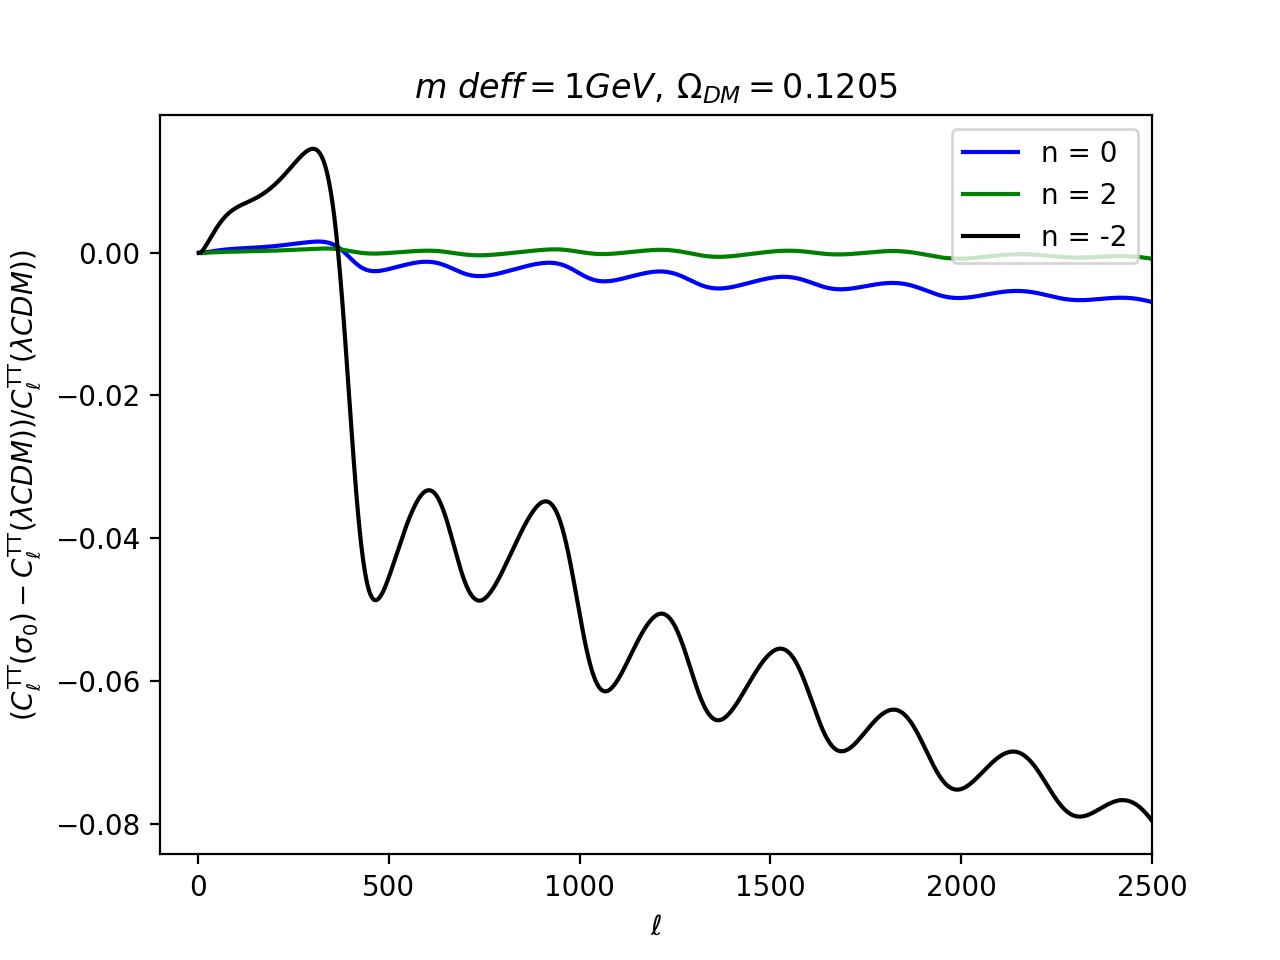

<IPython.core.display.Javascript object>


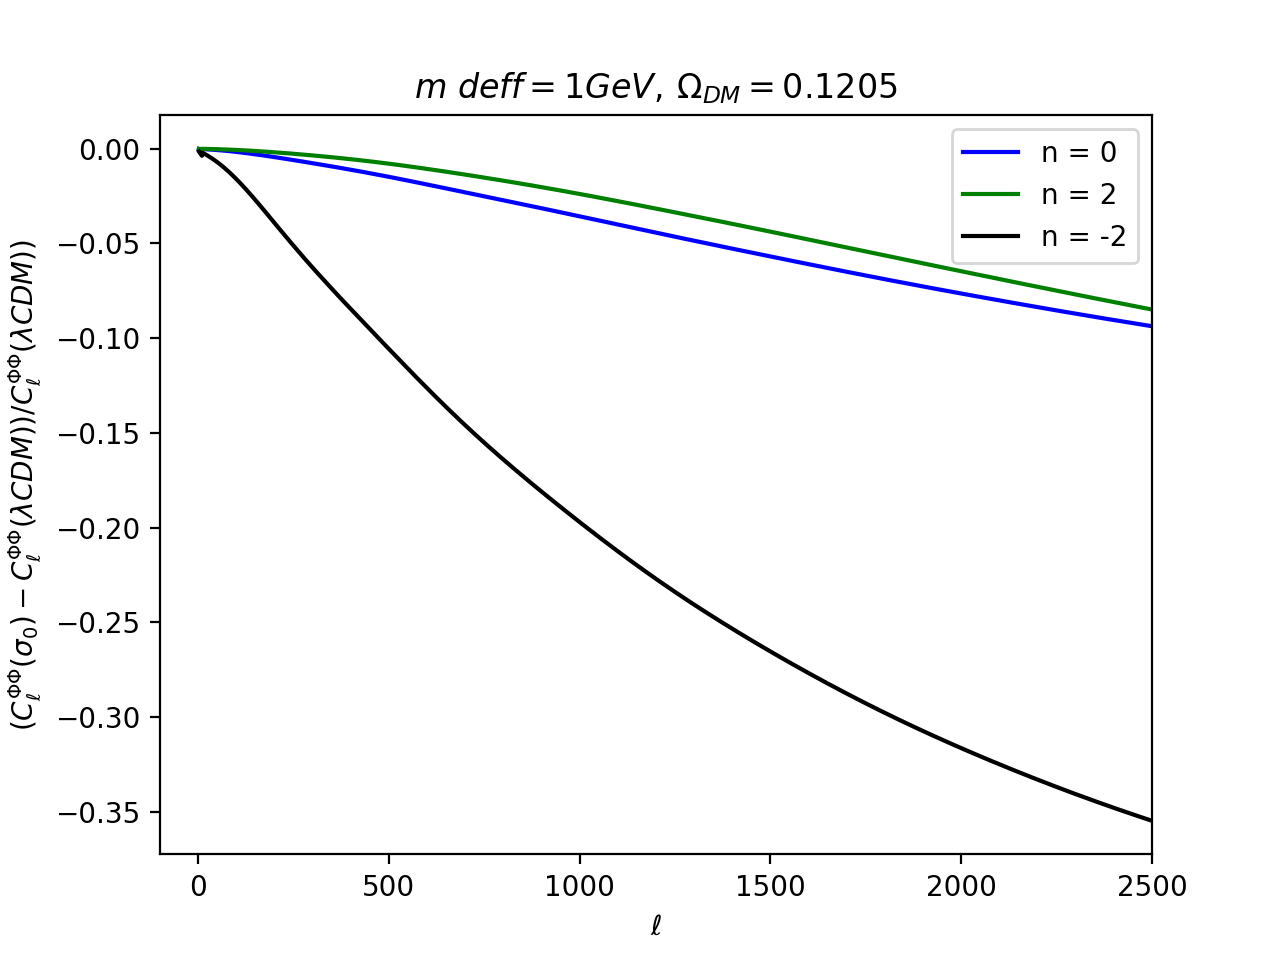

In [31]:
# plot C_l^TT residual power spectra
plt.figure()
plt.xscale('linear');plt.yscale('linear');plt.xlim(-100,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$ (C_\ell^\mathrm{TT}(\sigma_0) - C_\ell^\mathrm{TT}(\lambda CDM))/C_\ell^\mathrm{TT}(\lambda CDM))$')
plt.plot(ll1,res_ClTT1,'b-', label = "n = 0")
plt.plot(ll2,res_ClTT2,'g-', label = "n = 2")
plt.plot(ll3,res_ClTT3,'k-', label = "n = -2")
plt.legend(loc ="upper right")
plt.title(r"$m \ deff = 1 GeV,\, \Omega_{DM} = 0.1205$")
plt.show()
#plt.savefig(name+"_ClTT.pdf")
    
# plot C_l^PP (I could not find /kappa/kappa)
plt.figure()
plt.xscale('linear');plt.yscale('linear');plt.xlim(-100,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$ (C_\ell^\mathrm{\Phi\Phi}(\sigma_0) - C_\ell^\mathrm{\Phi\Phi}(\lambda CDM))/C_\ell^\mathrm{\Phi\Phi}(\lambda CDM))$')
plt.plot(ll1,res_ClPP1,'b-', label = "n = 0")
plt.plot(ll2,res_ClPP2,'g-', label = "n = 2")
plt.plot(ll3,res_ClPP3,'k-', label = "n = -2")
plt.legend(loc ="upper right")
plt.title(r"$m \ deff = 1 GeV,\, \Omega_{DM} = 0.1205$")
plt.show()
#plt.savefig(name+"_ClPP.pdf")
